In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Local
from robustranking.benchmark import Benchmark
from robustranking.comparison import BootstrapComparison
from robustranking.utils import PAR

## Artificial data

In [3]:
competition = Benchmark()
algorithms = [f"Algorithm-{i}" for i in range(1, 4)]
instances = [f"Instance-{i}" for i in range(1, 101)]
objectives = ["Runtime", "Quality"]

for a, i, o in itertools.product(algorithms, instances, objectives):
    factor = 0.8 if a == "Algorithm-1" else 1
    competition.add_run(a, i, o, factor * np.random.rand())
competition.add_run("Algorithm-1", "Instance-1", "Runtime", 1.0, replace=True)

competition.to_pandas()

value
algorithm   instance     objective          
Algorithm-1 Instance-1   Runtime    1.000000
                         Quality    0.626767
            Instance-2   Runtime    0.047745
                         Quality    0.079953
            Instance-3   Runtime    0.047501
...                                      ...
Algorithm-3 Instance-98  Quality    0.498014
            Instance-99  Runtime    0.939702
                         Quality    0.536118
            Instance-100 Runtime    0.290214
                         Quality    0.228030

[600 rows x 1 columns]

In [4]:
comparison = BootstrapComparison(competition.filter(objectives="Runtime"),
                                 minimise=True,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.mean)
comparison.compute()

In [5]:
comparison.get_confidence_intervals()

,mean,lb,ub,median
algorithm,,,,
Algorithm-1,0.393547,0.346753,0.440425,0.393547
Algorithm-3,0.472565,0.413613,0.530607,0.472565
Algorithm-2,0.520084,0.463860,0.577050,0.520084


In [6]:
comparison.get_ranking()

,rank,performance
algorithm,,
Algorithm-1,1,0.393428
Algorithm-3,2,0.472367
Algorithm-2,2,0.519871


## SAT 2022 main track

In [18]:
df = pd.read_csv("./Rundata/sc2022-detailed-results/main-seq.csv")
del df["verified-result"]
del df["claimed-result"]
del df["hash"]
df["objective"] = "PAR2"
df = df.set_index(["benchmark", "objective"])
df = df.stack().reset_index()

competition = Benchmark()
competition.from_pandas(df, "level_2", "benchmark", "objective", 0)
print("Complete table:", competition.check_complete())
competition.to_pandas()

Complete table: True


,,,value
algorithm,instance,objective,
CaDiCaL-watchsat-lto,traffic_f_unknown.cnf.xz,PAR2,195.751
CaDiCaL_DVDL_V1,traffic_f_unknown.cnf.xz,PAR2,209.456
CaDiCaL_DVDL_V2,traffic_f_unknown.cnf.xz,PAR2,209.084
CadicalReorder,traffic_f_unknown.cnf.xz,PAR2,221.549
Cadical_ESA,traffic_f_unknown.cnf.xz,PAR2,235.962
...,...,...,...
kissat-sc2022-light,mod2c-rand3bip-sat-240-2.shuffled-as.sat05-2519.cnf.xz,PAR2,210.302
kissat-watchsat-lto,mod2c-rand3bip-sat-240-2.shuffled-as.sat05-2519.cnf.xz,PAR2,251.345
kissat_inc,mod2c-rand3bip-sat-240-2.shuffled-as.sat05-2519.cnf.xz,PAR2,951.823


In [28]:
comparison = BootstrapComparison(competition,
                                 alpha=0.05,
                                 minimise=True,
                                 bootstrap_runs=5000,
                                 aggregation_method=PAR(2, 5000))
%time comparison.compute()

CPU times: user 2.12 s, sys: 104 ms, total: 2.22 s
Wall time: 2.41 s


In [29]:
comparison.get_ranking().join(comparison.get_confidence_intervals())

,rank,performance,mean,lb,ub,median
algorithm,,,,,,
Kissat_MAB-HyWalk,1,3334.324092,3334.226764,2922.124947,3746.916503,3334.226764
kissat_inc,1,3352.939153,3351.184556,2943.708416,3770.076246,3351.184556
kissat_pre,1,3379.761586,3379.282276,2968.232361,3801.378190,3379.282276
Kissat_MAB_MOSS,1,3403.355166,3403.775544,2991.896401,3823.381430,3403.775544
ekissat-mab-db-v1,1,3403.714021,3401.607338,2978.756160,3835.729331,3401.607338
Kissat_MAB_UCB,1,3409.946190,3407.910590,3004.076923,3835.186204,3407.910590
kissat-mab-gb,1,3430.789633,3427.010617,3016.791722,3866.700605,3427.010617
Kissat_MAB_ESA,1,3446.099518,3444.501310,3025.362033,3881.456609,3444.501310
ekissat-mab-gb-db,1,3486.564136,3484.574931,3068.500669,3915.791505,3484.574931


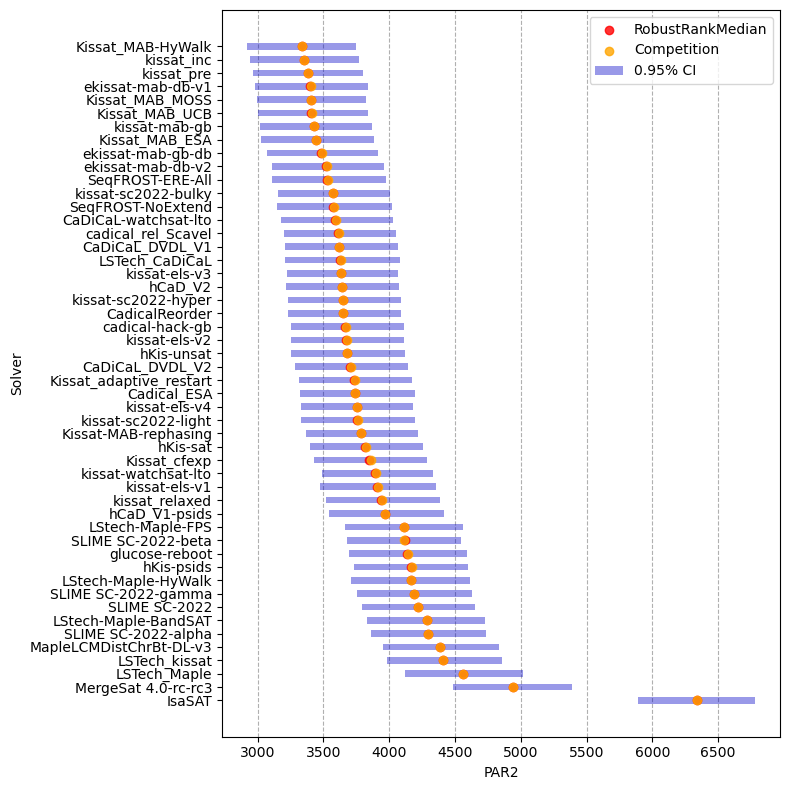

In [30]:
cidf = comparison.get_confidence_intervals()
cidf = cidf.sort_values("mean", ascending=True)
means = []
competition_results = []
yticks = []
handles = []
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_axisbelow(True)
ax.grid(axis="x", linestyle="--", zorder=-1)

n = len(cidf)
for i, (algorithm, bounds) in enumerate(cidf.iloc[:n].iterrows()):
    pos = n - i
    means.append([bounds["median"], pos])
    yticks.append(algorithm)
    competition_result = comparison.aggregation_method(df[df["level_2"] == algorithm][0])
    competition_results.append([competition_result, pos])
    height = 0.5
    bar = patches.Rectangle(
        (bounds["lb"], pos-(height/2)),
        bounds["ub"] - bounds["lb"],
        height,
        facecolor=(0, 0, 0.78, 0.4),
        label="{:.2f}% CI".format(1-comparison.alpha),
    )
    p = ax.add_patch(bar)

handles.append(ax.scatter(*zip(*means), color="red", label="RobustRankMedian", alpha=0.8))
handles.append(ax.scatter(*zip(*competition_results), color="orange", label="Competition", alpha=0.8))
handles.append(p)

ax.set_xlabel("PAR2")
ax.set_ylabel("Solver")
ax.set_yticks(list(range(1, n+1)))
ax.set_yticklabels(yticks[::-1])
plt.legend(handles=handles)
plt.tight_layout()
plt.show()
